## Bayesian Model Averaging Code

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#from ILAMB.Confrontation    import Confrontation
#from ILAMB.Variable         import Variable
#from ILAMB.ModelResult      import ModelResult
#from mpl_toolkits.basemap   import Basemap
#from netCDF4                import Dataset
#from mpi4py                 import MPI
from sklearn                import linear_model
from sklearn.neighbors      import KernelDensity
from scipy.stats            import norm
from copy                   import deepcopy
#import ILAMB.ilamblib as il
import numpy as np
import matplotlib.pyplot as plt
#import logging
import os

import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import shapefile
import pyproj

#! /usr/bin/env python3

# data libraries
import sys
import os
import datetime as dt  # Python standard library datetime  module
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from netCDF4 import Dataset,num2date  # http://code.google.com/p/netcdf4-python/
import pandas as pd
import geopandas as gpd
from pyproj import Proj, transform
from matplotlib.path import Path

# plotting libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.style as style
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point 
import cartopy.mpl.ticker as cticker
import glob
import array

In [2]:
## Loading in dictionaries of dataframe data

with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/monthly_shelves.pkl', 'rb') as f:
    monthly_shelves = pickle.load(f)

In [3]:
with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/yearly_shelves.pkl', 'rb') as f:
    yearly_shelves = pickle.load(f)

In [4]:
with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/seasonal_shelves.pkl', 'rb') as f:
    seasonal_shelves = pickle.load(f)

In [5]:
with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/reanalysis_monthly.pkl', 'rb') as f:
    reanalysis_monthly = pickle.load(f)

In [6]:
with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/reanalysis_yearly.pkl', 'rb') as f:
    reanalysis_yearly = pickle.load(f)

In [7]:
with open('/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/reanalysis_seasonal.pkl', 'rb') as f:
    reanalysis_seasonal = pickle.load(f)

In [18]:
12*160


1920

In [19]:
temp = monthly_shelves['Ross West']['temp spatial average']
time = monthly_shelves['Ross West']['year']
model_names = monthly_shelves['Ross West']['Model']

test = temp

y1 = 1940
y2 = 2099

shelf_cropped_time = np.zeros((len(test),1910))
shelf_cropped_temp = np.zeros((len(test),1910))

for i in range(len(test)):
    
    data_for_indicies = np.array(time[i])

    index1 = np.where(data_for_indicies == y1)[0][0]
    index2 = np.where(data_for_indicies == y2)[0][0]+1# Added to correct the time to make the models range from 1940-2022
    
    shelf_cropped_time[i] = time[i][index1:index2]
    shelf_cropped_temp[i] = temp[i][index1:index2]
    
shelf_cropped_temp.shape

model_mean = np.mean(shelf_cropped_temp,axis = 0)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

shelf_threshold = Thresholds['Threshold Temps'][2]


index_TT = find_nearest(model_mean,shelf_threshold)
index_TT

#model_mean = np.mean(np.array(temp),axis=0

temp_reanalysis = reanalysis_monthly['Ross West']['temp spatial average'][0]
time_reanalysis = reanalysis_monthly['Ross West']['year'][0]

f1 = plt.figure(1,figsize=(15,12))

for i in range(len(shelf_cropped_temp)):
    plt.plot(time[i],temp[i],linewidth=1,label = '_nolegend_', color= 'lightgray')
    #plt.plot(time[i],temp[i],linewidth=1,label = model_names[0], color= 'lightgray')
    

#plt.plot(NorESM['Total Time'][0],NorESM['Full Bias-Corrected Model'][0],label = 'NorESM2-MM corrected', color = 'red')

plt.plot(shelf_cropped_time[0],model_mean,label = 'Ensemble Mean', color= 'orange')
plt.plot(time_reanalysis,temp_reanalysis,label = 'ERA5', color= 'blue')
plt.axvline(x = shelf_cropped_time[0][index_TT[1]])
plt.xlabel("Time(Years)", fontsize = 18)
plt.ylabel(r"Annual Surface Temperature ($\degree$ C)", fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(1940,2100)
plt.legend()


temp = bias_corrected_monthly['Ross West']['Full Bias-Corrected Model']
time = bias_corrected_monthly['Ross West']['Total Time']
model_names = bias_corrected_monthly['Ross West']['Model Names']

test = temp

y1 = 1940
y2 = 2099

shelf_cropped_time = np.zeros((len(test),1910))
shelf_cropped_temp = np.zeros((len(test),1910))

for i in range(len(test)):
    
    data_for_indicies = np.array(time[i])

    index1 = np.where(data_for_indicies == y1)[0][0]
    index2 = np.where(data_for_indicies == y2)[0][0]+1# Added to correct the time to make the models range from 1940-2022
    
    shelf_cropped_time[i] = time[i][index1:index2]
    shelf_cropped_temp[i] = temp[i][index1:index2]
    
shelf_cropped_temp.shape

model_mean = np.mean(shelf_cropped_temp,axis = 0)
#print(model_mean)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx



shelf_threshold = Thresholds['Threshold Temps'][2]


index_TT = find_nearest(model_mean,shelf_threshold)
index_TT
#model_mean = np.mean(np.array(temp),axis=0

temp_reanalysis = reanalysis_monthly['Ross West']['temp spatial average'][0]
time_reanalysis = reanalysis_monthly['Ross West']['year'][0]

plt.figure(figsize=(15,12))

for i in range(len(shelf_cropped_temp)):
    plt.plot(time[i],temp[i],linewidth=1,label = '_nolegend_', color= 'lightgray')
    #plt.plot(time[i],temp[i],linewidth=1,label = model_names[0], color= 'lightgray')
    

#plt.plot(NorESM['Total Time'][0],NorESM['Full Bias-Corrected Model'][0],label = 'NorESM2-MM corrected', color = 'red')

plt.plot(shelf_cropped_time[0],model_mean,label = 'Ensemble Mean', color= 'orange')
plt.plot(time_reanalysis,temp_reanalysis,label = 'ERA5', color= 'blue')
plt.axvline(x = shelf_cropped_time[0][index_TT[1]])
plt.xlabel("Time(Years)", fontsize = 18)
plt.ylabel(r"Annual Surface Temperature ($\degree$ C)", fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(2022,2100)
plt.legend()

ValueError: could not broadcast input array from shape (1909,) into shape (1910,)

In [329]:
index_TT

(-20.230326129544167, 41)

In [330]:
shelf_cropped_time[0][41]

1981.0

In [283]:
temp = bias_corrected_yearly['Abbot']['Full Bias-Corrected Model'][0]
print(temp)
time = bias_corrected_yearly['Abbot']['Total Time'][0]
print(time)
model_names = bias_corrected_yearly['Abbot']['Model Names']

test = temp

print(len(test))

y1 = 1940
y2 = 2099

shelf_cropped_time = np.zeros((len(test),160))
shelf_cropped_temp = np.zeros((len(test),160))

for i in range(len(test)):
    
    data_for_indicies = np.array(time[i])

    index1 = np.where(data_for_indicies == y1)[0][0]
    #print(index1)
    index2 = np.where(data_for_indicies == y2)[0][0]+1# Added to correct the time to make the models range from 1940-2022
    #print(index2)
    shelf_cropped_time[i] = time[i][index1:index2]
    shelf_cropped_temp[i] = temp[i][index1:index2]
    
shelf_cropped_temp.shape

model_mean = np.mean(shelf_cropped_temp,axis = 0)

#model_mean = np.mean(np.array(temp),axis=0

temp_reanalysis = reanalysis_yearly['Abbot']['temp spatial average'][0]
time_reanalysis = reanalysis_yearly['Abbot']['year'][0]

plt.figure(figsize=(15,12))

#for i in range(len(shelf_cropped_temp)):
plt.plot(time[0],temp[0],linewidth=1,label = '_nolegend_', color= 'lightgray')
    #plt.plot(time[i],temp[i],linewidth=1,label = model_names[0], color= 'lightgray')
    

#plt.plot(NorESM['Total Time'][0],NorESM['Full Bias-Corrected Model'][0],label = 'NorESM2-MM corrected', color = 'red')

plt.plot(shelf_cropped_time[0],model_mean,label = 'Ensemble Mean', color= 'orange')
plt.plot(time_reanalysis,temp_reanalysis,label = 'ERA5', color= 'blue')
plt.xlabel("Time(Years)", fontsize = 18)
plt.ylabel(r"Annual Surface Temperature ($\degree$ C)", fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(1940,2100)
plt.legend()


251


IndexError: index 0 is out of bounds for axis 0 with size 0

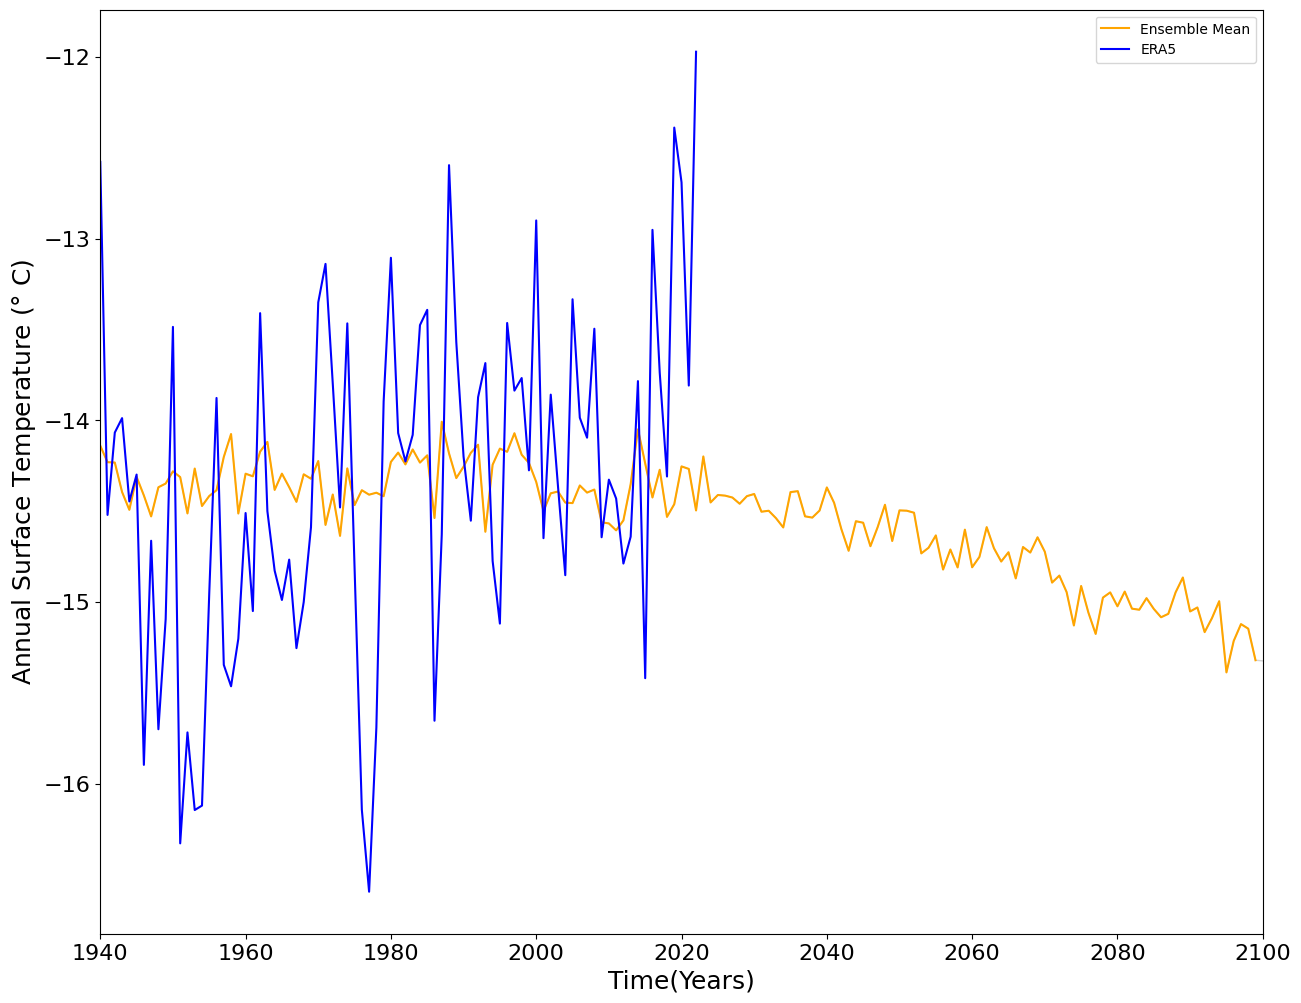

In [257]:
temp = bias_corrected_yearly['Thwaites']['Full Bias-Corrected Model']
time = bias_corrected_yearly['Thwaites']['Total Time']
model_names = bias_corrected_yearly['Thwaites']['Model Names']

test = temp

y1 = 1940
y2 = 2099

shelf_cropped_time = np.zeros((len(test),160))
shelf_cropped_temp = np.zeros((len(test),160))

for i in range(len(test)):
    
    data_for_indicies = np.array(time[i])

    index1 = np.where(data_for_indicies == y1)[0][0]
    index2 = np.where(data_for_indicies == y2)[0][0]+1# Added to correct the time to make the models range from 1940-2022
    
    shelf_cropped_time[i] = time[i][index1:index2]
    shelf_cropped_temp[i] = temp[i][index1:index2]
    
shelf_cropped_temp.shape

model_mean = np.mean(shelf_cropped_temp,axis = 0)

#model_mean = np.mean(np.array(temp),axis=0

temp_reanalysis = reanalysis_yearly['Thwaites']['temp spatial average'][0]
time_reanalysis = reanalysis_yearly['Thwaites']['year'][0]

f1 = plt.figure(1,figsize=(15,12))

for i in range(len(shelf_cropped_temp)):
    plt.plot(time[i],temp[i],linewidth=1,label = '_nolegend_', color= 'lightgray')
    #plt.plot(time[i],temp[i],linewidth=1,label = model_names[0], color= 'lightgray')
    

#plt.plot(NorESM['Total Time'][0],NorESM['Full Bias-Corrected Model'][0],label = 'NorESM2-MM corrected', color = 'red')

plt.plot(shelf_cropped_time[0],model_mean,label = 'Ensemble Mean', color= 'orange')
plt.plot(time_reanalysis,temp_reanalysis,label = 'ERA5', color= 'blue')
plt.xlabel("Time(Years)", fontsize = 18)
plt.ylabel(r"Annual Surface Temperature ($\degree$ C)", fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(1940,2100)
plt.legend()


In [140]:
yearly_shelves['Abbot'].keys()

Index(['file path', 'Model', 'gridsize', 'temp', 'year', 'month',
       'original latitude', 'original longitude', 'cropped temp',
       'cropped lat', 'cropped lon', 'temp spatial average'],
      dtype='object')

In [106]:
test = temp

y1 = 1940
y2 = 2099

shelf_cropped_time = np.zeros((len(test),160))
shelf_cropped_temp = np.zeros((len(test),160))

for i in range(len(test)):
    
    data_for_indicies = np.array(time[i])

    index1 = np.where(data_for_indicies == y1)[0][0]
    index2 = np.where(data_for_indicies == y2)[0][0]+1# Added to correct the time to make the models range from 1940-2022
    
    shelf_cropped_time[i] = time[i][index1:index2]
    shelf_cropped_temp[i] = temp[i][index1:index2]
    
shelf_cropped_temp.shape

np.mean(shelf_cropped_temp,axis = 0)

array([-13.16720197, -13.54798866, -13.39440249, -13.23880883,
       -13.28866254, -13.22360189, -13.18573432, -13.49149163,
       -12.93238452, -13.1661779 , -13.44407117, -13.2922037 ,
       -13.34579211, -13.1134097 , -13.15585024, -12.84663393,
       -13.03163839, -13.33012393, -13.39065195, -13.03337514,
       -13.15440646, -13.12063209, -13.299095  , -13.02550596,
       -13.77223219, -13.38013121, -13.36430056, -13.01969957,
       -13.26475505, -13.06112829, -13.24605699, -13.04146144,
       -13.16269456, -12.83171946, -12.83714725, -12.74447744,
       -13.02901117, -13.01255866, -13.13061311, -12.97394713,
       -12.9030244 , -13.01502728, -12.59570948, -12.29736013,
       -12.76581787, -12.75808725, -12.77670171, -12.36295243,
       -12.73762738, -11.94025807, -12.6066747 , -12.41285233,
       -13.04046808, -12.9088533 , -12.23546928, -12.8280193 ,
       -12.70664443, -12.5781425 , -12.94202921, -12.80298062,
       -12.32974277, -12.8227909 , -12.4064363 , -12.37

In [9]:
def iceshelf_stats(path,path2): 
    
    # Lists of data pulled from paths
    fpath = list() # The path to location in my raid directory
    model_names = list() # The model name pulled from the file name of the data 
    modeltemps = list() # The temperature of the shelf for each year from model
    mean_annual_avg_temp = list() #mean of annual temperature values over historical period
    shelf_name = list()
    
    #List for bias analysis
    model_temps_cropped = list()
    
    # Plotting all of the models on one figure
    f1 = plt.figure(1,figsize=(15,12))
    for path in glob.iglob(f'{path}/*.nc'): #iterating through files in path specified
        
        #Reading in Datafiles
        fpath.append(path)
        fname = path
        datain = Dataset(fname, 'r')
        
        ##Splitting The Path to label the models
        head_tail = os.path.split(path) #makes the path a variable
        mystring = str(head_tail[1]) #turns the variable into a string
        x = mystring.split(".", 5)#parsing the model name by periods
        model_names.append(x[1]) # the second section of string is the model name
        shelf_name.append(x[4])
        
        #Creating Variables
        var = datain.variables['tas'] #2meter surface temperture
        gridsize = var[1].size
        lat = datain.variables['latitude'][:] #latitude
        lon = datain.variables['longitude'][:] #longitude
        timevar = datain.variables['time'] #in days since 1850
        dtime = num2date(timevar[:],timevar.units) # The next two lines make the time variable readable
        ym = np.zeros((len(dtime),2), int)
        
        ##Spatial Average over sheet
        var_spatial_avg = np.mean(var[:,:,:],axis = (1,2)) #Taking the spatial average of yearly temperature over the iceshelf
        var_spatial_avg = var_spatial_avg - 273.15 #converting the temperature from Kelvin to Celsius
        modeltemps.append(var_spatial_avg[0:249]) #appending the model temps to a list
        model_temps_cropped.append(var_spatial_avg[110:173]) #appending the model temps to a list
        
        ##Time Component
        for i in range(len(dtime)): #Creating an aray of years from the time variable
            ym[i,0] = dtime[i].year
            
        #Plotting the Data
        plt.figure(1)
        plt.plot(ym[:,0],var_spatial_avg,linewidth=2.5,label = '_nolegend_', color= 'lightgray')
        plt.xlabel("Time (Years)", fontsize = 18)
        plt.ylabel(r"Austral Summer Surface Temperature ($\degree$ C)", fontsize = 18)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlim(1959,2100)
        #plt.legend()
    
    #Plotting the ERA5 data on the same figure
    fname_era5 = path2
    datain_era5 = Dataset(fname_era5, 'r')


    var_era5 = datain_era5.variables['t2m'] #2meter surface temperture
    lat_era5 = datain_era5.variables['latitude'][:] #latitude
    lon_era5 = datain_era5.variables['longitude'][:] #longitude
    timevar_era5 = datain_era5.variables['time'] #in days since 1959
    dtime_era5 = num2date(timevar_era5[:],timevar_era5.units) # The next two lines make the time variable readable
    ym_era5 = np.zeros((len(dtime_era5),2), int)

    var_era5_spatial_avg = np.mean(var_era5[:,:,:],axis = (1,2)) #Taking the spatial average of yearly temperature over the iceshelf
    var_era5_spatial_avg = var_era5_spatial_avg - 273.15
    
    for i in range(len(dtime_era5)): #Creating an aray of years from the time variable
        ym_era5[i,0] = dtime_era5[i].year
    
    plt.figure(1)
    plt.plot(ym_era5[:,0],var_era5_spatial_avg,label = 'ERA5', color= 'blue')
    
    #Adding Mean Line to Plot
    models_mean = np.mean(modeltemps,axis=0)
    model_names.append('Model Mean')
    model_temps_cropped.append(models_mean[110:173])
    
    #Calculating Regression Line
    regress = linregress(ym[0:249,0], models_mean)
    regression_line = ym[0:249,0]*regress[0] + regress[1]

    plt.figure(1)
    plt.plot(ym[0:249,0],models_mean,label = 'Model Mean', color= 'orange')
    plt.legend()
    plt.close()
    
    return f1,model_names,ym,var_spatial_avg,modeltemps,var_era5_spatial_avg,ym_era5,model_temps_cropped,gridsize
        
    

In [211]:
bias_corrected_yearly

{'Abbot':          Model Names                                         Total Time  \
 0         NorESM2-MM  [1849, 1850, 1851, 1852, 1853, 1854, 1855, 185...   
 1           E3SM-1-1  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 2         CAS-ESM2-0  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 3          KIOST-ESM  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 4       E3SM-1-1-ECA  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 5       E3SM-Project  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 6        CAMS-CSM1-0  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 7      MPI-ESM1-2-HR  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 8          INM-CM4-8  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 9          INM-CM5-0  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 10       FGOALS-f3-L  [1849, 1850, 1851, 1852, 1853, 1854, 1855, 185...   
 11     AWI-CM-1-1-MR  [1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...   
 12

In [10]:
bias_corrected_monthly = {}
bias_corrected_seasonal = {}
bias_corrected_yearly = {}

In [11]:
def bias_correction(shelf_name,type_of_analysis):

    if type_of_analysis == 'yearly':
        shelf = yearly_shelves[shelf_name]
        shelf_reanalysis = reanalysis_yearly[shelf_name]
        data_for_indicies_of_array_to_fill = yearly_shelves[shelf_name]['year'][0]
     
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)

        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = yearly_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1# Added to correct the time to make the models range from 1940-2022
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]
            
            
    elif type_of_analysis == 'seasonal':
        shelf = seasonal_shelves[shelf_name]
        shelf_reanalysis = reanalysis_seasonal[shelf_name]
        data_for_indicies_of_array_to_fill = seasonal_shelves[shelf_name]['year'][0]
        
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)
        
        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1# Added to correct the time to make the models range from 1940-2022

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = seasonal_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]
        
        #Dropping Last season which is only made up of 1 month
        shelf_reanalysis_temp = shelf_reanalysis_temp[:-1]
        shelf_reanalysis_year = shelf_reanalysis['year'][0][:-1]
        
    elif type_of_analysis == 'monthly':
        shelf = monthly_shelves[shelf_name]
        shelf_reanalysis = reanalysis_monthly[shelf_name]
        data_for_indicies_of_array_to_fill = monthly_shelves[shelf_name]['year'][0]
        
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)
        
        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1 # Added to correct the time to make the models range from 1940-2022

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = monthly_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]

    model_names = list(shelf['Model'])
    

    #Making data frame of new dataset
    df = pd.DataFrame(list(zip(model_names,shelf_cropped,shelf_cropped_temp)),columns=['Model Names','Cropped Time','Cropped Models'])

    plot(cropped_time[0],cropped_surface_temp[0])
    cropped_surface_temp = df['Cropped Models']
    cropped_time = df['Cropped Time']
    #print(cropped_time[0])
    model_names = df['Model Names']

    length_train = np.shape(shelf_reanalysis_temp)[0]

    nmod = 1

    bias_corrected_models = []
    bias_corrected_full_model = []
    time_list = []
    y_train = shelf_reanalysis_temp
    print(y_train.shape)
    a = []
    b = []
    
    for i in range(nmod):
        modelname = model_names[i]
        x_train = cropped_surface_temp[i].reshape(-1,1)
        print(modelname,x_train.shape)
        reg = linear_model.LinearRegression()
        reg.fit(x_train, y_train)
        b.append(reg.coef_)
        a.append(reg.intercept_)
        full_model_temp = np.array(shelf['temp spatial average'][i]).reshape(-1,1)
        time = shelf['year'][i]
        len_model = len(full_model_temp)
        time_list.append(time)
        bias_corrected_models.append(reg.predict(x_train))
        bias_corrected_full_model.append(reg.predict(full_model_temp))

    bias_corrected_models = pd.DataFrame(list(zip(model_names,cropped_time,bias_corrected_models,time_list,bias_corrected_full_model,a,b)),columns=['Model Names','1940-2022','Bias-Corrected Models','Total Time','Full Bias-Corrected Model','Intercept','Slope'])

    return bias_corrected_models

In [25]:
def bias_correction(shelf_name,type_of_analysis):

    if type_of_analysis == 'yearly':
        shelf = yearly_shelves[shelf_name]
        shelf_reanalysis = reanalysis_yearly[shelf_name]
        data_for_indicies_of_array_to_fill = yearly_shelves[shelf_name]['year'][0]
     
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)

        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = yearly_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1# Added to correct the time to make the models range from 1940-2022
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]
            
    elif type_of_analysis == 'seasonal':
        shelf = seasonal_shelves[shelf_name]
        shelf_reanalysis = reanalysis_seasonal[shelf_name]
        data_for_indicies_of_array_to_fill = seasonal_shelves[shelf_name]['year'][0]
        
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)
        
        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1# Added to correct the time to make the models range from 1940-2022

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = seasonal_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]
        
        #Dropping Last season which is only made up of 1 month
        shelf_reanalysis_temp = shelf_reanalysis_temp[:-1]
        shelf_reanalysis_year = shelf_reanalysis['year'][0][:-1]
        
    elif type_of_analysis == 'monthly':
        shelf = monthly_shelves[shelf_name]
        shelf_reanalysis = reanalysis_monthly[shelf_name]
        data_for_indicies_of_array_to_fill = monthly_shelves[shelf_name]['year'][0]
        
        shelf_reanalysis_temp = np.array(shelf_reanalysis['temp spatial average'][0])
        y1 = shelf_reanalysis['year'][0][0]
        y2 = shelf_reanalysis['year'][0][-1]
        #print(y2)
        
        index1_fill = np.where(data_for_indicies_of_array_to_fill == y1)[0][0]
        index2_fill = np.where(data_for_indicies_of_array_to_fill == y2)[0][-1]+1 # Added to correct the time to make the models range from 1940-2022

        shelf_cropped = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))
        shelf_cropped_temp = np.zeros((len(shelf['year']),len(shelf['year'][0][index1_fill:index2_fill])))

        for i in range(len(shelf['year'])):
            #print(shelf['Model'][i])
            data_for_indicies = monthly_shelves[shelf_name]['year'][i]

            index1 = np.where(data_for_indicies == y1)[0][0]
            #print(index1)
            index2 = np.where(data_for_indicies == y2)[0][-1]+1
            #print(index2)

            #print(np.where(shelf['year'][i][index1:index2] == 1962))
            
            shelf_cropped[i] = shelf['year'][i][index1:index2]
            shelf_cropped_temp[i] = shelf['temp spatial average'][i][index1:index2]

    model_names = list(shelf['Model'])
    

    #Making data frame of new dataset
    df = pd.DataFrame(list(zip(model_names,shelf_cropped,shelf_cropped_temp)),columns=['Model Names','Cropped Time','Cropped Models'])

    
    cropped_surface_temp = df['Cropped Models']
    #print(cropped_surface_temp[0])
    cropped_time = df['Cropped Time']
    #print(cropped_time[0])
    model_names = df['Model Names']
    


    length_train = np.shape(shelf_reanalysis_temp)[0]

    nmod = len(model_names)
    nmod = 1

    bias_corrected_models = []
    bias_corrected_full_model = []
    time_list = []
    y_train = shelf_reanalysis_temp
    
    f1 = plt.figure(1,figsize=(15,12))
    
    plt.scatter(cropped_time[0],cropped_surface_temp[0],label = 'Model')
    plt.scatter(shelf_reanalysis['year'][0],shelf_reanalysis_temp, label='ERA5')
    plt.legend()
    #plt.close()
    
    plt.figure(figsize=(15,12))
    plt.scatter(cropped_surface_temp[0],shelf_reanalysis_temp)
    #print(y_train.shape)
    a = []
    b = []
    
    for i in range(nmod):
        modelname = model_names[i]
        x_train = cropped_surface_temp[i]
        plt.plot(x_train, y_train, 'o', label='original data')
        slope, intercept, r, p, se = linregress(x_train, y_train)
        b.append(slope)
        a.append(intercept)
        full_model_temp = np.array(shelf['temp spatial average'][i])
        #print(full_model_temp[index1:index2])
        time = shelf['year'][i]
        #len_model = len(full_model_temp)
        time_list.append(time)
        new_model = intercept + slope*full_model_temp
        plt.plot(x_train, intercept + slope*x_train, 'r', label='fitted line')
        #bias_corrected_models.append(reg.predict(x_train))
        bias_corrected_full_model.append(new_model)
        
    #plt.figure(1)
    #plt.plot(time[index1:index2],new_model[index1:index2],label = 'Bias corrected', color= 'red')
   
    bias_corrected_models = pd.DataFrame(list(zip(model_names,time_list,bias_corrected_full_model,a,b)),columns=['Model Names','Total Time','Full Bias-Corrected Model','Intercept','Slope'])

    return bias_corrected_models

In [13]:
def iceshelf_dictionary(dictionary,type_of_analysis):

    for key in dictionary:    
        df_shelf = bias_correction(key,type_of_analysis)
        if type_of_analysis == 'seasonal':
            bias_corrected_seasonal[key] = df_shelf
            print(key)
        elif type_of_analysis == 'yearly':
            bias_corrected_yearly[key] = df_shelf
            print(key)
        elif type_of_analysis == 'monthly':
            bias_corrected_monthly[key] = df_shelf
            print(key)
            
    task = 'completed task'
                
    return task

-6.206437049943421 0.5634254629673435


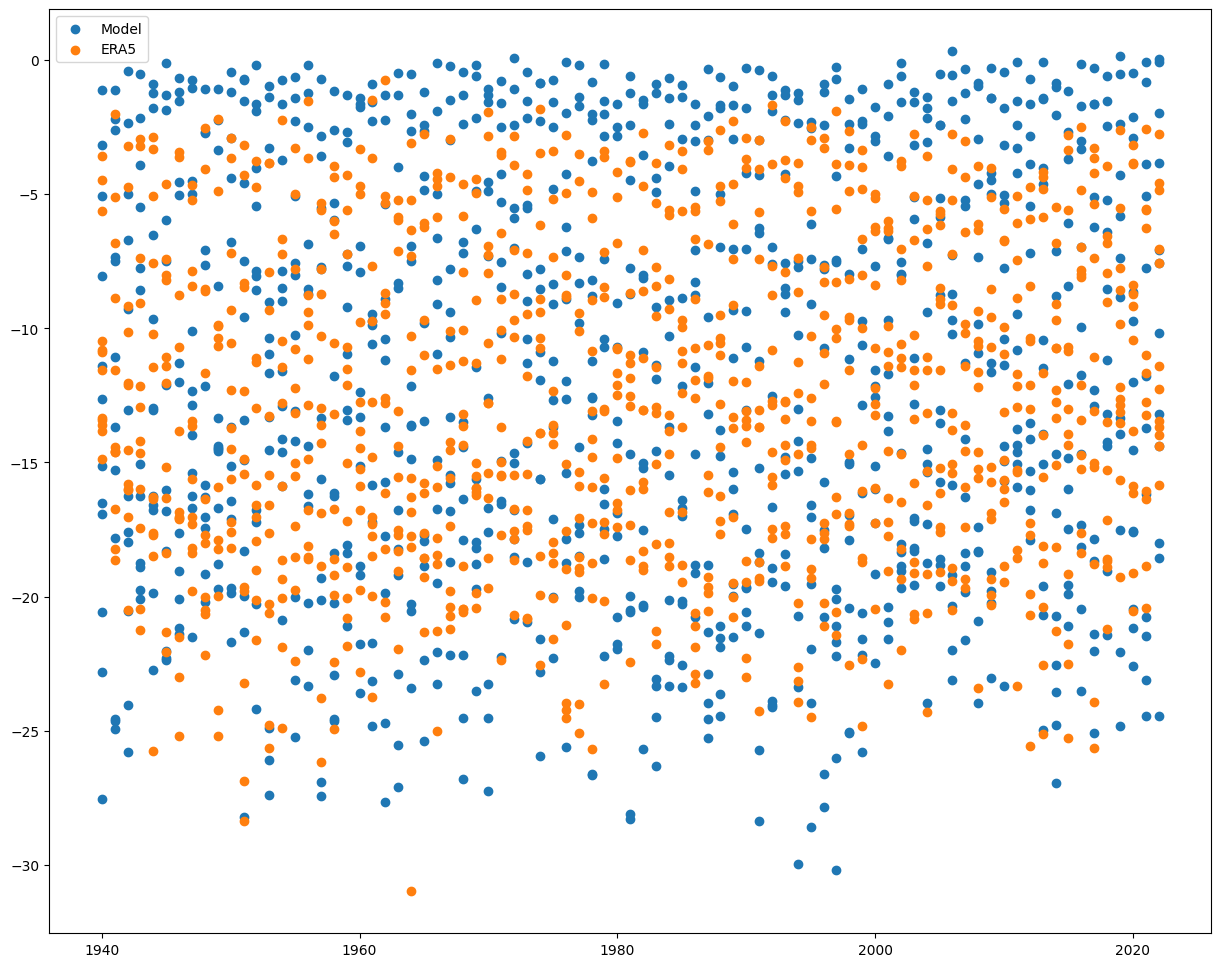

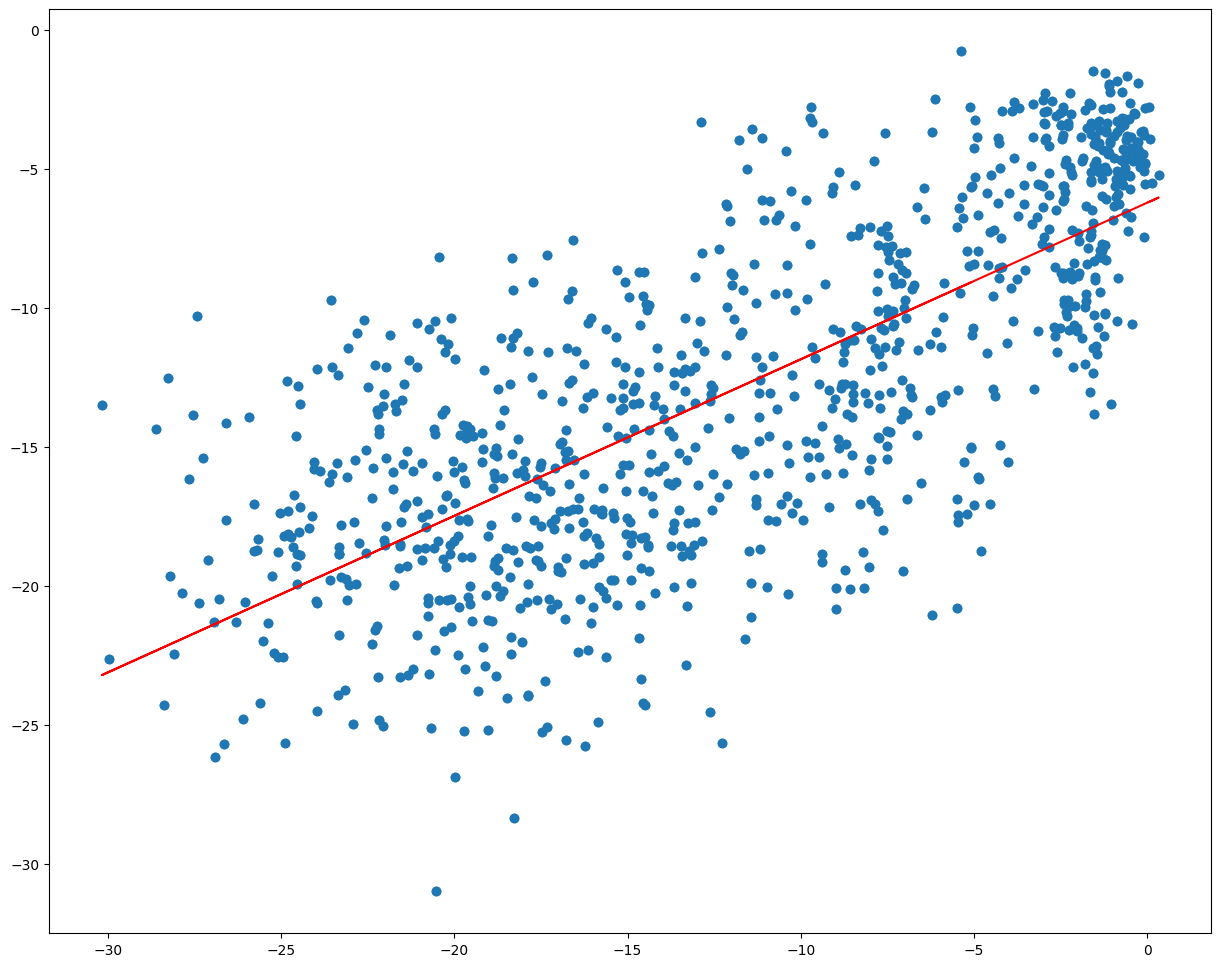

In [26]:
NorESM = bias_correction('Abbot','monthly')

NorESM.keys()

print(NorESM['Intercept'][0], NorESM['Slope'][0])

-10.39187496333549 0.16345948770496269


<Figure size 1500x1200 with 0 Axes>

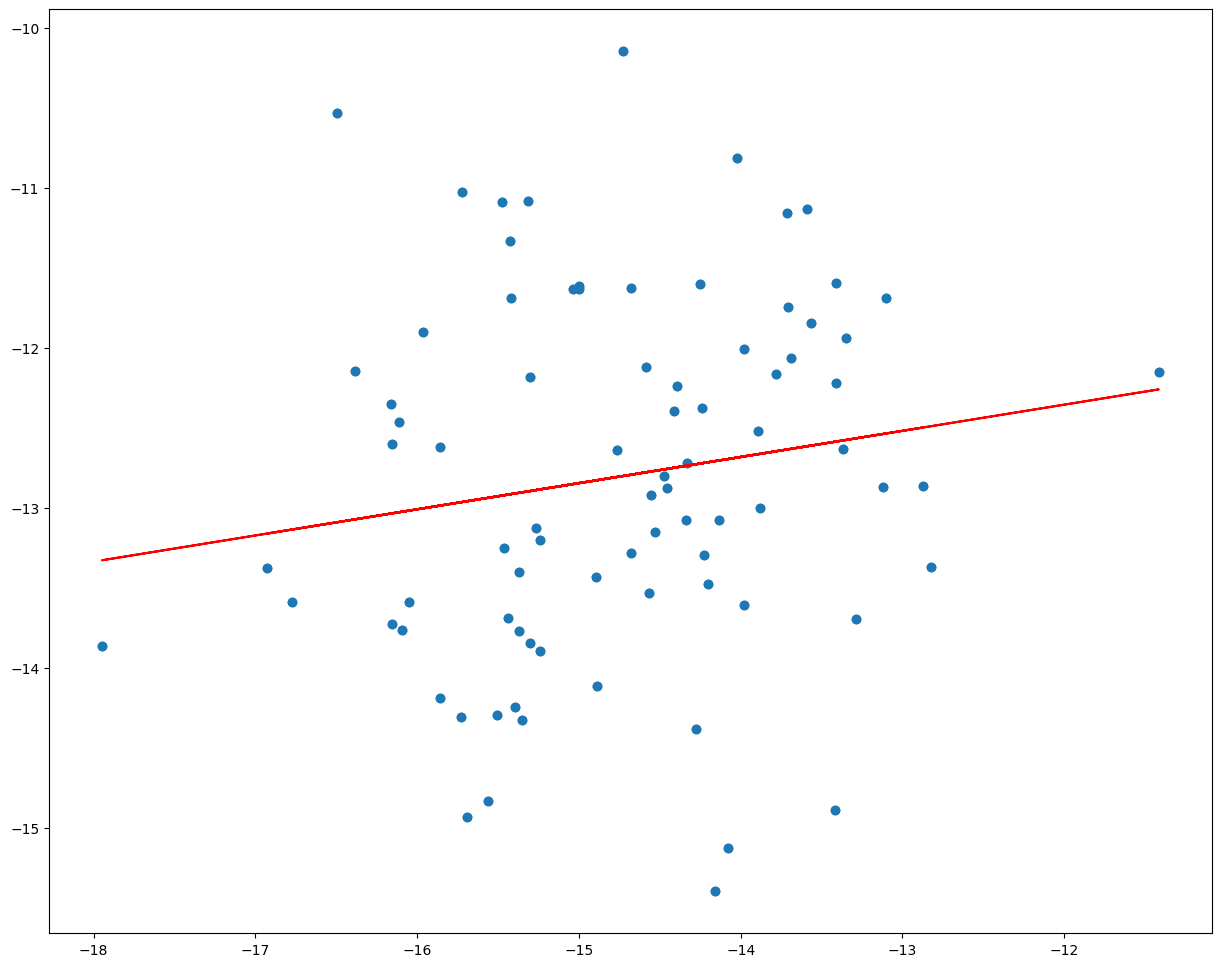

In [22]:
NorESM = bias_correction('Abbot','yearly')

NorESM.keys()

print(NorESM['Intercept'][0], NorESM['Slope'][0])

Abbot
Amery
Atka
Baudouin
Borchgrevink
Brunt Stancomb
Conger Glenzer
Cook
Cosgrove
Crosson
Dotson
Drygalski
Ekstrom
Filchner
Fimbul
George VI
Getz
Holmes
Jelbart
Land
LarsenB
LarsenC
LarsenD
Lazarev
Mariner
Mertz
Moscow University
Nansen
Nickerson
Nivl
pine island
Prince Harald
Quar
Rennick
Riiser-Larsen
Ronne
Shackleton
Stange
Sulzberger
Thwaites
Totten
Venable
Vigrid
West
Withrow
Ross East
Ross West


'completed task'

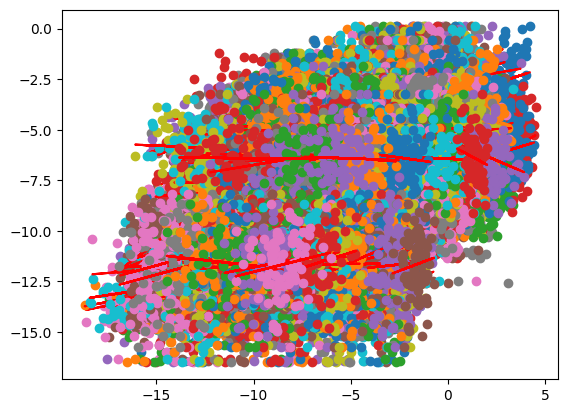

In [293]:
iceshelf_dictionary(seasonal_shelves,'seasonal')

Abbot
Amery
Atka
Baudouin
Borchgrevink
Brunt Stancomb
Conger Glenzer
Cook
Cosgrove
Crosson
Dotson
Drygalski
Ekstrom
Filchner
Fimbul
George VI
Getz
Holmes
Jelbart
Land
LarsenB
LarsenC
LarsenD
Lazarev
Mariner
Mertz
Moscow University
Nansen
Nickerson
Nivl
pine island
Prince Harald
Quar
Rennick
Riiser-Larsen
Ronne
Shackleton
Stange
Sulzberger
Thwaites
Totten
Venable
Vigrid
West
Withrow
Ross East
Ross West


'completed task'

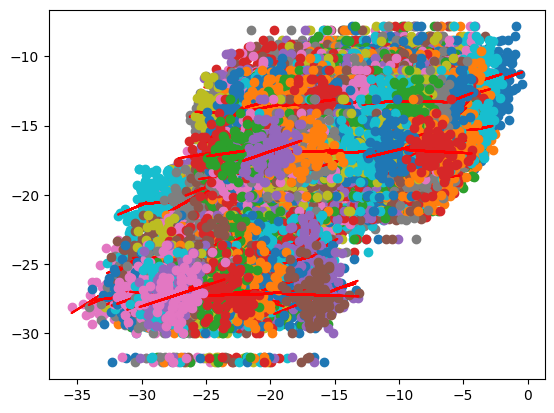

In [294]:
iceshelf_dictionary(yearly_shelves,'yearly')

Abbot
Amery
Atka
Baudouin
Borchgrevink
Brunt Stancomb
Conger Glenzer
Cook
Cosgrove
Crosson
Dotson
Drygalski
Ekstrom
Filchner
Fimbul
George VI
Getz
Holmes
Jelbart
Land
LarsenB
LarsenC
LarsenD
Lazarev
Mariner
Mertz
Moscow University
Nansen
Nickerson
Nivl
pine island
Prince Harald
Quar
Rennick
Riiser-Larsen
Ronne
Shackleton
Stange
Sulzberger
Thwaites
Totten
Venable
Vigrid
West
Withrow
Ross East
Ross West


'completed task'

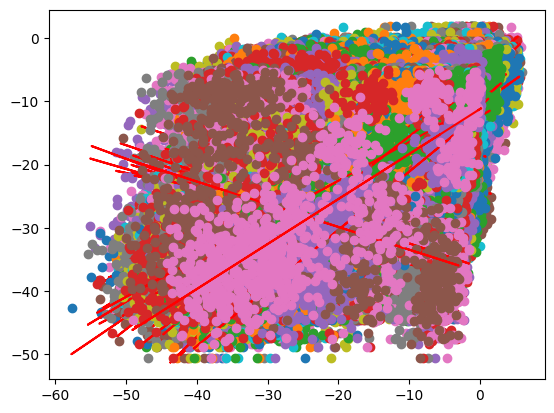

In [14]:
iceshelf_dictionary(monthly_shelves,'monthly')

In [15]:
bias_corrected_yearly['Ross West']

,Model Names,1940-2022,Bias-Corrected Models,Total Time,Full Bias-Corrected Model,Intercept,Slope
0,GFDL-ESM4,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-24.07443262364297, -24.024755392698314, -23...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-23.564397096032593, -23.493368312262916, -2...",[-11.865528882905712],[[0.5408950003636669]]
1,CMCC-CM2-SR5,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-26.914343621395233, -26.903551016943346, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-25.668574980101905, -25.619468190765076, -2...",[-11.24119873743269],[[0.5755119002107665]]
2,E3SM-1-1,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-26.673496731210403, -26.673496731210403, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-26.33127434671838, -26.33127434671838, -26....",[-15.669793512290944],[[0.5184799267186573]]
3,CAS-ESM2-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-25.59057573116761, -25.586838113624772, -25...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-25.207640896604836, -25.228781427375544, -2...",[-11.323653318252475],[[0.772708212263874]]
4,KIOST-ESM,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-27.461751244413193, -27.464758109730575, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-26.493731958191894, -26.504611343612954, -2...",[-19.829315668753043],[[0.4478589214539799]]
5,E3SM-1-1-ECA,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-26.60636605239163, -26.60636605239163, -26....","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-25.75522395199014, -25.75522395199014, -25....",[-11.610088661910616],[[0.6940801917715457]]
6,E3SM-Project,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-26.844135650867955, -26.844135650867955, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-25.63926943396121, -25.63926943396121, -25....",[-13.75366341155765],[[0.6040045007779355]]
7,CAMS-CSM1-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-23.835331627209413, -23.799113098274233, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-23.924168803696226, -23.8693993209162, -23....",[-13.073224280364414],[[0.6292729353912505]]
8,MPI-ESM1-2-HR,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-22.603179480795426, -22.53942645979282, -22...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-23.465357968172945, -23.393814130490156, -2...",[-14.476323087992798],[[0.5136609275174352]]
9,INM-CM4-8,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-27.542168030432787, -27.545300028984396, -2...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-27.356046318595276, -27.360207766148168, -2...",[-29.02691722534434],[[-0.07946521760674932]]


In [125]:
bias_corrected_seasonal['Amery']

,Model Names,1940-2022,Bias-Corrected Models,Total Time,Full Bias-Corrected Model,Intercept,Slope
0,NESM3,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.554212922754418], [-8.549841452698255], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.558159141280925], [-8.565464803703732], [...",[-8.371186388154085],[[0.019689519493190633]]
1,E3SM-1-1,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.548730012332118], [-8.64490354357278], [-...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.835095277065903], [-8.661348641762752], [...",[-7.772639643329842],[[0.149428162857256]]
2,CAS-ESM2-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-9.46851219752737], [-7.9787439698905995], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.525590486041448], [-9.232557277640502], [...",[-8.432766612923476],[[0.972855956585361]]
3,KIOST-ESM,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.882088525262507], [-8.465258353959413], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.309946560998645], [-8.795580066925163], [...",[-6.830231440146003],[[0.24712534264381542]]
4,E3SM-1-1-ECA,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.651330382718422], [-8.684494055467118], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.719760579501711], [-8.510968627309218], [...",[-8.153056012620016],[[0.09717506456135704]]
5,E3SM-Project,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.383524578449872], [-8.885022755302941], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.991309426862632], [-8.493626137751198], [...",[-7.268513577550764],[[0.24659103246045194]]
6,CAMS-CSM1-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.95904813012243], [-8.528013491290888], [-...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.800780447150544], [-8.485134365980416], [...",[-9.170349449830438],[[0.3870326787448699]]
7,MPI-ESM1-2-HR,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.52300112062469], [-8.616854200262937], [-...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.51931099783101], [-8.595163085492212], [-...",[-9.63622156372256],[[-0.16810940602617813]]
8,INM-CM4-8,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.565408040332942], [-8.915743498188155], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.760783785510215], [-8.287390151805266], [...",[-6.429520408347052],[[0.18730925863533815]]
9,INM-CM5-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-8.514376008905572], [-8.533850569137956], [...","[1850, 1851, 1852, 1853, 1854, 1855, 1856, 185...","[[-8.518067233853639], [-8.533910917769541], [...",[-8.724626873297284],[[-0.015678921385813636]]


In [126]:
reanalysis_seasonal['Amery']

,file path,Model,gridsize,temp,year,month,original latitude,original longitude,cropped temp,cropped lat,cropped lon,temp spatial average
0,/raid01/mafields/tas/MODELS_filtered/ssp585/ic...,seasmean,600,"[[[-16.50503954314962, -16.436785442687608, -1...","[1940, 1941, 1942, 1943, 1944, 1945, 1946, 194...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-68.5, -68.75, -69.0, -69.25, -69.5, -69.75, ...","[67.0, 67.25, 67.5, 67.75, 68.0, 68.25, 68.5, ...","[[-10.170478134314749, -11.92039709296813, -11...","[-68.5, -68.75, -68.75, -68.75, -68.75, -68.75...","[70.25, 69.75, 70.0, 70.25, 70.5, 70.75, 71.0,...","[-12.476993687776107, -11.326269627765155, -11..."


In [186]:
with open('bias_corrected_monthly_shelves.pkl', 'wb') as f:
    pickle.dump(bias_corrected_monthly, f)

In [187]:
with open('bias_corrected_yearly_shelves.pkl', 'wb') as f:
    pickle.dump(bias_corrected_yearly, f)

In [188]:
with open('bias_corrected_seasonal_shelves.pkl', 'wb') as f:
    pickle.dump(bias_corrected_seasonal, f)

In [87]:
bias_corrected_models

,Model Names,1940-2022,Bias-Corrected Models
0,NorESM2-MM,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.422117872830295, -12.484233179888143, -1..."
1,E3SM-1-1,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.743139753104685, -12.744329700160945, -1..."
2,CAS-ESM2-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.232010857411824, -12.245428958989516, -1..."
3,KIOST-ESM,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.567464749986128, -12.57565473154963, -12..."
4,E3SM-1-1-ECA,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.10150416025586, -12.104374158037883, -12..."
5,E3SM-Project,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.431485081508303, -12.433193483015456, -1..."
6,CAMS-CSM1-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.023030145320005, -12.052810129237498, -1..."
7,MPI-ESM1-2-HR,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-11.68446285393599, -11.75012108519054, -11...."
8,INM-CM4-8,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.442331017207195, -12.444796414723488, -1..."
9,INM-CM5-0,"[1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945....","[[-12.426389566409055, -12.42754956700333, -12..."


In [7]:
def RunBMA(obs, MOD):
    n_mod = len(MOD)
    obs_data = obs.data
    
    #Stopping condition
    epsilon = 1e-3 
    B = 5000 

    def CalculateLikelihood(obs, dataset, w, sigma):
        l = np.log( ( (w.reshape(n_mod, 1, 1) * norm.pdf(np.tile(obs, (n_mod, 1, 1)), dataset, sigma)).sum(axis=0) ) + 1e-300 ).sum(axis=(0, 1))
        return l

    #Initialization
    w = np.zeros((n_mod, B))
    w[:, 0] = 1/n_mod 

    sigma = np.zeros(B)
    sigma[0] = np.sqrt(np.average((np.tile(obs_data, (n_mod, 1, 1)) - dataset)**2))

    l_0 = CalculateLikelihood(obs_data, dataset, w[:, 0], sigma[0])

    #Iteration
    for b in range(1, B):

        #E-step
        z = w[:, (b-1)].reshape(n_mod, 1, 1) * (norm.pdf( np.tile(obs_data, (n_mod, 1, 1)), dataset, sigma[b-1] ) + 1e-30)
        denominator = z.sum(axis=0) 
        z = z / denominator
        
        #M-step
        w[:, b] = np.average(z, axis=(1, 2))
        sigma[b] = np.average( (z * ( np.tile(obs_data, (n_mod, 1, 1)) - dataset)**2).sum(axis=0) )
        sigma[b] = np.sqrt(sigma[b])

        #stopping-condition
        np.seterr(over="ignore", under="ignore")
        l = CalculateLikelihood(obs_data, dataset, w[:, b], sigma[b])
        if np.absolute(l - l_0) > epsilon:
            l_0 = l
        else:
            break
    
    #v_BMA = deepcopy(MOD[0])
    #v_BMA.data = np.average(np.array([m.data for m in MOD]), axis = 0, weights = w)
    #v_BMA.data = np.ma.masked_array(v_BMA.data, mask=MOD[0].data.mask)
    #MOD.append(v_BMA)

    w = w[:, 0:b]
    sigma = sigma[0:b]

    data_BMA = np.empty_like(dataset[0])
    data_BMA = np.average(np.array(dataset), axis=0, weights=w[:, -1])
    dataset.append(data_BMA)

    np.savetxt("./tas_result/Weights_tas.txt", w)
    np.savetxt("./tas_result/Sigma_tas.txt", sigma)
    return w, sigma, obs_data, dataset

def PlotWeights(w):
    n_mod = w.shape[0]
    time = np.arange(w.shape[1])
    plt.figure(figsize=(12, 8))
    for i in range(n_mod):
        plt.plot(time, w[i], label="Model {i}".format(i=str(i+1)))
    plt.legend(loc='best')
    plt.xlabel("Iterations")
    plt.ylabel("Weights")
    plt.savefig("./tas_result/Weights_tas.png", format="png", dpi=600)
    plt.close()
    return

def PlotModels(obs_data, dataset_BMA):

    #Calculate spatial average
    obs_mean = np.average(obs_data, axis=1)
    SpatialMean = np.average(dataset_BMA, axis=2)
    time = np.arange(obs_mean.shape[0])
    plt.figure(figsize=(12, 8))
    plt.plot(time, obs_mean, color="black", linestyle="--", label="Obs", lw = 0.5)
    for i in range(SpatialMean.shape[0]):
        plt.plot(time, SpatialMean[i], label="Model {i}".format(i=str(i+1)), lw = 0.5)
    plt.legend(loc="best")
    plt.xlabel("Time(Months)")
    plt.ylabel("Tas(K)")
    plt.savefig("./tas_result/SpatialMean_tas.png", format="png", dpi=600)
    plt.close()
    return

def CalculateCC(obs_data, dataset_BMA):
    #Calculate correlation coefficient
    #n_MOD = len(dataset_BMA)
    obs_data_row = obs_data.reshape(obs_data.size)
    #dataset_BMA_row = np.apply_over_axes(func1d=np.reshape, axis=0, arr=dataset_BMA, newshape=obs_data.size)
    dataset_BMA_row = []
    for i in range(len(dataset_BMA)):
        dataset_BMA_row.append(dataset_BMA[i].reshape(obs_data.size))
    dataset_BMA_row = np.array(dataset_BMA_row)
    corr = np.corrcoef(np.vstack((obs_data_row, dataset_BMA_row)))[0, 1:]
    #header = tuple( "Model {i}".format( i = str(k) ) for k in range(1, n_MOD))
    #header = header + tuple("BMA")
    #header = ", ".join(header)
    np.savetxt("./tas_result/Corr_tas.txt", corr, delimiter=",")
    return corr

def CalculateRMSE(obs_data, dataset_BMA):
    #def RMSE(mod):
    #    return np.sqrt(np.average((obs_data - mod)**2))
    #RMSE = np.apply_along_axis(RMSE, 0, dataset_BMA)
    RMSE = []
    for i in range(len(dataset_BMA)):
        RMSE.append( np.sqrt(np.average((obs_data - dataset_BMA[i])**2)) )
    RMSE = np.array(RMSE)
    np.savetxt("./tas_result/RMSE_tas.txt", RMSE, delimiter=",")
    return RMSE

def PlotDensity(obs_data, dataset_BMA, Bw):
    for bw in Bw:
        #bw = 1.5
        obs_mean = np.average(obs_data, axis=1)[:, np.newaxis]
        SpatialMean = np.average(dataset_BMA, axis=2)
        #X_plot = np.linspace(0, np.amax(np.vstack((obs_mean[:, 0], SpatialMean)))*2, 1000)[:, np.newaxis]
        X_plot = np.linspace(270, 297, 1000)[:, np.newaxis]
        plt.figure(figsize=(12, 8))
        for i in range(SpatialMean.shape[0]):
            if i == SpatialMean.shape[0] - 1:
                kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(SpatialMean[i].reshape((-1, 1)))
                log_dens = kde.score_samples(X_plot)
                plt.plot(X_plot[:, 0], np.exp(log_dens), label="Model BMA")
            else :
                kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(SpatialMean[i].reshape((-1, 1)))
                log_dens = kde.score_samples(X_plot)
                plt.plot(X_plot[:, 0], np.exp(log_dens), label="Model {i}".format(i=str(i+1)))
        kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(obs_mean)
        log_dens = kde.score_samples(X_plot)
        plt.plot(X_plot[:, 0], np.exp(log_dens), label="Obs")
        plt.legend(loc="best")
        plt.xlabel("Tas(K)")
        plt.ylabel("PDF")
        plt.savefig("./tas_result/Density_tas_bw={bw}.png".format(bw=bw), format="png", dpi=600)            
        plt.close()


In [ ]:
model_root = "/home/haoyang/ILAMB/ConfBMA/MODELS/"
M = ReadModelResult(model_root)
    
obs_file = "/home/haoyang/ILAMB/ConfBMA/DATA/tas/tas_CRU_1976_2005.nc"
variable = "tas"
obs = ReadBenchmark(obs_file, variable)

obs, MOD = PrepareData(obs, M, variable)

w, sigma, obs_data, dataset_BMA = RunBMA(obs, MOD)

PlotWeights(w)
CalculateCC(obs_data, dataset_BMA)
CalculateRMSE(obs_data, dataset_BMA)
PlotDensity(obs_data, dataset_BMA)
#PlotModels(obs_data, dataset_BMA)

In [15]:
fname = '/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/TT_IS.nc'
datain = Dataset(fname, 'r')

fname_1 = '/raid01/mafields/tas/MODELS_filtered/ssp585/jupyter/saved_data/dT_IS.nc'
datain1 = Dataset(fname_1, 'r')

TT = datain.variables['thresholdT'][:]
TT_uncertainty = datain1.variables['dTT'][:]


Names = ['Nansen','Drygalski','Ross West','Filchner','Ross East','Vigrid','Ronne','Amery',
        'Publications','Baudouin','Tracy Tremenchus','Lazarev','Rennick','LarsenB','Quar','Riiser-Larsen'
        'Brunt Stancomb','Tucker','Lily','Borchgrevink','Ekstrom','Mariner','Fimbul','Nivl','LarsenD'
        'Bach','LarsenC','LarsenE','Cook','West','Cosgrove','Jelbart','Sulzberger','Conger Glenzer',
        'Ninnis','Mertz','Pine Island','Shackleton','George VI','Moscow University','Nickerson','Prince Harald'
        ,'Wilkins','Thwaites','Frostman-Lord-Shuman-Anandakri','Stange','Getz','Slava','Dotson','Swinburne',
        'Crosson','Abbot','Totten','Land','Venable','Holmes']

Thresholds = pd.DataFrame(list(zip(Names,TT,TT_uncertainty)),columns=['Model Names','Threshold Temps','Temp Uncertainty'])


In [16]:
Thresholds

,Model Names,Threshold Temps,Temp Uncertainty
0,Nansen,-20.118471,2.011847
1,Drygalski,-20.925136,0.755822
2,Ross West,-20.570977,1.204529
3,Filchner,-17.713133,0.889902
4,Ross East,-18.728981,1.186594
5,Vigrid,-14.731370,0.760710
6,Ronne,-15.878980,0.657938
7,Amery,-20.228553,1.168172
8,Publications,-15.670661,1.567066
9,Baudouin,-12.936224,0.495351
